In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
df = pd.read_csv("../data/merged_games_df.csv")
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,ADVENTURES OF TRON,2600,1981,Action,Mattel Interactive,630000.0,30000.0,NaN,10000.0,670000,2600,ADVENTURES OF TRON,16.10,False,False
1,AIRLOCK,2600,1981,Action,Data Age,360000.0,20000.0,NaN,NaN,390000,2600,AIRLOCK,17.00,False,False
2,ALIEN,2600,1981,Action,20th Century Fox Video Games,740000.0,40000.0,NaN,10000.0,790000,2600,ALIEN,61.24,True,True
3,ARMOR AMBUSH,2600,1981,Action,Mattel Interactive,150000.0,10000.0,NaN,NaN,170000,2600,ARMOR AMBUSH,9.92,False,False
4,ASTEROIDS,2600,1980,Shooter,Atari,4000000.0,260000.0,NaN,50000.0,4310000,2600,ASTEROIDS,14.06,False,False


In [23]:
# drop unnecessary columns
df = df.drop(columns=['Name', 'Platform'])

In [24]:
# dealwith nans
df = df.fillna(0)


In [25]:
# round munrical data
data = df.round(2)

In [26]:
data.shape


(1283, 13)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1283 non-null   int64  
 1   Genre         1283 non-null   object 
 2   Publisher     1283 non-null   object 
 3   NA_Sales      1283 non-null   float64
 4   EU_Sales      1283 non-null   float64
 5   JP_Sales      1283 non-null   float64
 6   Other_Sales   1283 non-null   float64
 7   Global_Sales  1283 non-null   int64  
 8   Console       1283 non-null   object 
 9   Game Title    1283 non-null   object 
 10  Price         1283 non-null   float64
 11  Mean          1283 non-null   bool   
 12  Median        1283 non-null   bool   
dtypes: bool(2), float64(5), int64(2), object(4)
memory usage: 112.9+ KB


In [28]:
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Price
count,1283.000000,1.283000e+03,1.283000e+03,1.283000e+03,1.283000e+03,1.283000e+03,1283.000000
mean,1996.144973,4.949883e+05,1.972486e+05,1.450195e+05,3.302416e+04,8.705144e+05,31.979018
std,4.840275,1.333183e+06,3.937541e+05,4.419527e+05,7.684834e+04,1.930835e+06,29.505511
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,1.410000
25%,1996.000000,6.000000e+04,2.000000e+04,0.000000e+00,0.000000e+00,1.300000e+05,10.020000
50%,1998.000000,1.800000e+05,7.000000e+04,0.000000e+00,1.000000e+04,3.400000e+05,20.610000
75%,1999.000000,4.800000e+05,1.900000e+05,5.500000e+04,4.000000e+04,9.200000e+05,45.220000
max,2003.000000,2.908000e+07,3.870000e+06,6.810000e+06,1.510000e+06,4.024000e+07,139.500000


In [29]:
# most popular genre
data['Genre'].value_counts()

Sports          246
Action          200
Racing          183
Shooter         132
Fighting        124
Platform        107
Role-Playing     62
Puzzle           51
Simulation       49
Misc             49
Strategy         42
Adventure        38
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

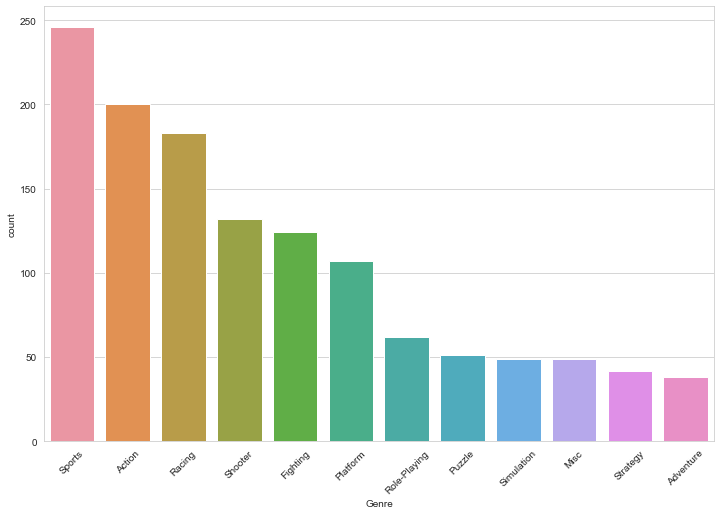

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Genre', data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

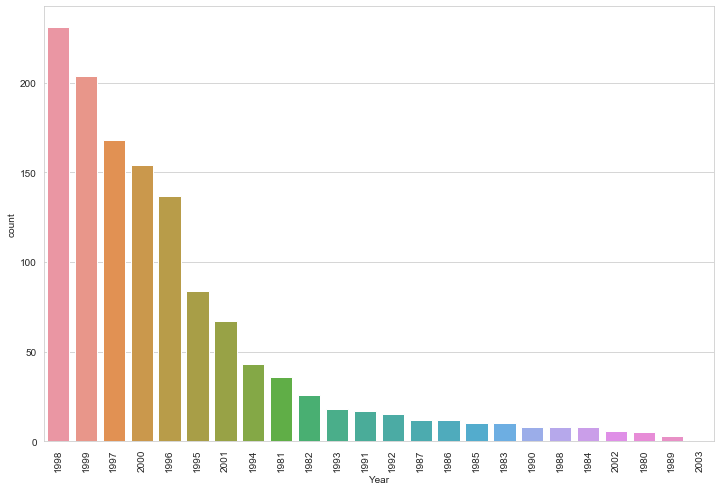

In [31]:
# most games releases in one yoear
plt.figure(figsize=(12, 8))
sns.countplot(x='Year', data=data, order = data.groupby(by=['Year'])['Game Title'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

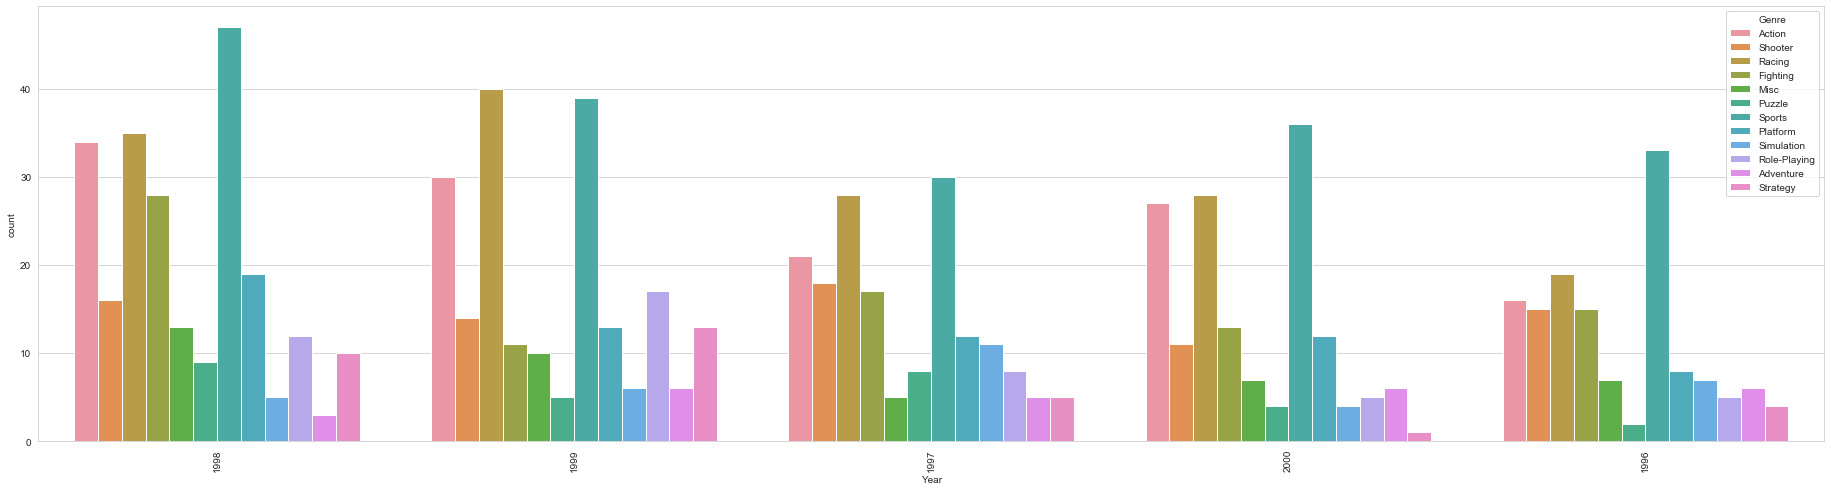

In [32]:
# Top 5 years by Genre
plt.figure(figsize=(32, 8))
sns.countplot(x="Year", data=data, hue = 'Genre', order = data.Year.value_counts().iloc[:5].index)
plt.xticks(rotation=90)

In [33]:
# year with highest sales
year_data = data.groupby(by=['Year'])['Global_Sales'].sum()
year_data  = year_data.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

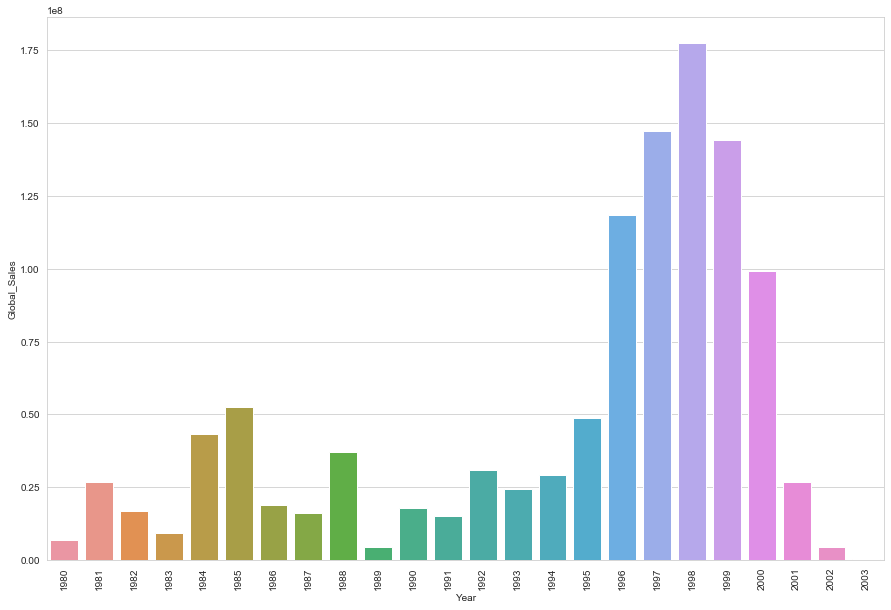

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='Global_Sales', data=year_data)
plt.xticks(rotation=90)

In [35]:
#find number of different values
data['Price'].value_counts()

17.00     3
11.09     3
5.55      3
16.86     3
25.70     3
         ..
107.75    1
65.25     1
5.79      1
45.67     1
14.97     1
Name: Price, Length: 1151, dtype: int64

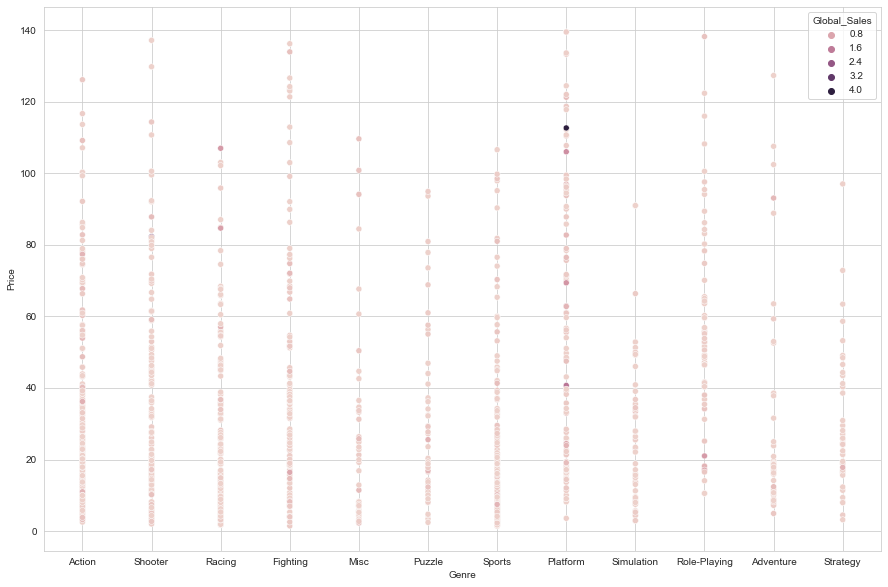

In [64]:
#plot scatter
plt.figure(figsize=(15,10))
sns.scatterplot(x='Genre', y ='Price',  hue ='Global_Sales', data=data)
# plt.xticks(rotation=90)

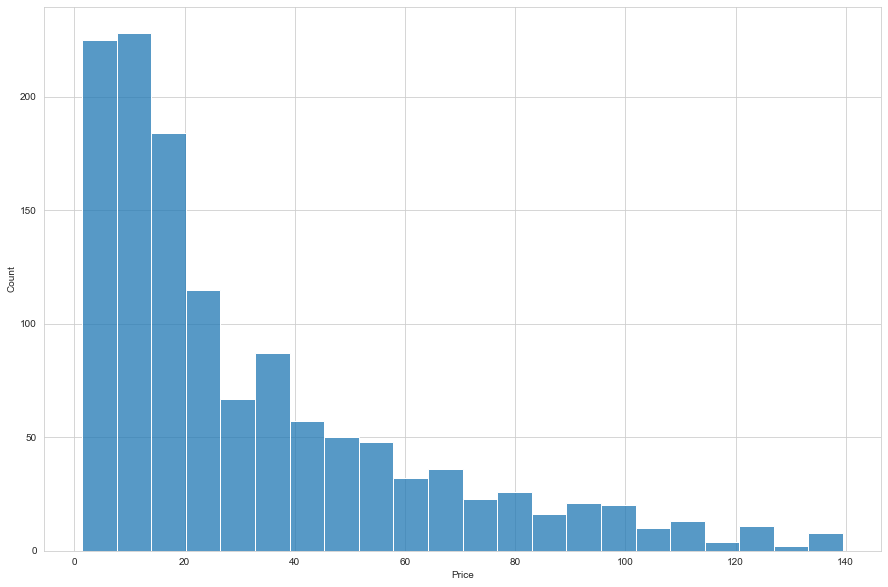

In [59]:
#check distribution of price
plt.figure(figsize=(15,10))
sns.histplot(data['Price'])

# sns.histplot(x = 'Price', hue ='Genre', data=data')
# sns.scatterplot(x='Genre', y ='Price',  hue ='Global_Sales', data=data)

In [210]:
data.head(1)

,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,1981,Action,Mattel Interactive,630000.0,30000.0,0.0,10000.0,670000,2600,ADVENTURES OF TRON,16.1,False,False


In [227]:
# Importing encoded data created by Michelle for modeling
encoded_data = pd.read_csv("../data/encoded_data.csv")
encoded_data.head(1)

,Name,Platform LabelCode,Year,Genre LabelCode,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11
0,ADVENTURES OF TRON,0,1981,0,Mattel Interactive,630000,30000,0,10000,670000,...,0,0,0,0,0,0,0,0,0,0


In [181]:
#drop columns that are not needed
encoded_df = encoded_data.drop(columns =['Genre LabelCode','Platform LabelCode','Name', 'Publisher', 'Console', 'Game Title', 'Mean', 'Median'])

In [226]:
# encoded_df.info()

In [220]:
#create price bins to improve model 
bin_ranges = [0, 10, 20, 40, 80, 140]
bin_names = [1, 2, 3, 4, 5]
encoded_df['Price_bin_custom_range'] = pd.cut(
                                           np.array(
                                              encoded_df['Price']), 
                                              bins=bin_ranges)
encoded_df['Price_bin_custom_label'] = pd.cut(
                                           np.array(
                                              encoded_df['Price']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)
# view the binned features 
encoded_df[['Price', 
               'Price_bin_custom_range',   
               'Price_bin_custom_label']].iloc[1071:1076]

,Price,Price_bin_custom_range,Price_bin_custom_label
1071,3,"(0, 10]",1
1072,7,"(0, 10]",1
1073,8,"(0, 10]",1
1074,4,"(0, 10]",1
1075,12,"(10, 20]",2


In [241]:
# encoded_df.to_csv("../data/encoded_binned_5.csv", index=False)
encoded_df.head(1)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Price,Platform_0,Platform_1,Platform_2,...,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11,Price_bin_custom_range,Price_bin_custom_label
0,1981,630000,30000,0,10000,670000,16,1,0,0,...,0,0,0,0,0,0,0,0,"(10, 20]",2


In [242]:
target = encoded_df['Price_bin_custom_label'] 
target_names = ['1', '2', '3', '4', '5']

In [243]:
features = encoded_df.drop(columns= ['Price', 'Price_bin_custom_range', 'Price_bin_custom_label'])
feature_names = features.columns
# features.head(1)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target, test_size=0.30, random_state=42)
                                                   

In [245]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc = rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.4649350649350649

In [258]:
sorted(zip(rfc.feature_importances_, feature_names), reverse=True)


[(0.16238597988301426, 'Global_Sales'),
 (0.14000431488892856, 'NA_Sales'),
 (0.13268985464233107, 'Year'),
 (0.1108508044009831, 'EU_Sales'),
 (0.07825980458035676, 'JP_Sales'),
 (0.057554455699744066, 'Other_Sales'),
 (0.04685001132944759, 'Platform_4'),
 (0.038474248010505654, 'Genre_10'),
 (0.02697050588436394, 'Platform_2'),
 (0.02256475964459938, 'Genre_0'),
 (0.021534049108614985, 'Genre_6'),
 (0.020898749176516282, 'Genre_7'),
 (0.020780222143776676, 'Genre_2'),
 (0.02022287503850428, 'Genre_8'),
 (0.020172234728615394, 'Genre_4'),
 (0.012934553683488455, 'Genre_9'),
 (0.011623379588542447, 'Genre_5'),
 (0.010739525550968628, 'Genre_1'),
 (0.010165042643412758, 'Genre_11'),
 (0.009757173994325796, 'Genre_3'),
 (0.0071000130066253865, 'Platform_0'),
 (0.005710108148199939, 'Platform_7'),
 (0.004170150524794872, 'Platform_5'),
 (0.003900345067956601, 'Platform_3'),
 (0.003686838631383015, 'Platform_1'),
 (0.0, 'Platform_6')]

In [262]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

Features sorted by their score:
[(0.1624, 'JP_Sales'), (0.14, 'Year'), (0.1327, 'Platform LabelCode'), (0.1109, 'Genre LabelCode'), (0.0783, 'NA_Sales'), (0.0576, 'EU_Sales'), (0.0469, 'Platform_2'), (0.0385, 'Genre_8'), (0.027, 'Platform_0'), (0.0226, 'Platform_6'), (0.0215, 'Genre_4'), (0.0209, 'Genre_5'), (0.0208, 'Genre_0'), (0.0202, 'Genre_6'), (0.0202, 'Genre_2'), (0.0129, 'Genre_7'), (0.0116, 'Genre_3'), (0.0107, 'Platform_7'), (0.0102, 'Genre_9'), (0.0098, 'Genre_1'), (0.0071, 'Other_Sales'), (0.0057, 'Platform_5'), (0.0042, 'Platform_3'), (0.0039, 'Platform_1'), (0.0037, 'Global_Sales'), (0.0, 'Platform_4')]


In [263]:
feature_importances = pd.DataFrame({"Feature Names": X.columns, "Importances": rfc.feature_importances_}).sort_values(by="Importances", ascending=False)

ValueError: arrays must all be same length

In [247]:
from sklearn import metrics

In [248]:
from sklearn.metrics import classification_report, confusion_matrix

In [249]:
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[81 23  5  4  0]
 [27 26 19 13  1]
 [ 8 21 33 13  2]
 [ 2 10 19 33  4]
 [ 1  4  9 21  6]]


              precision    recall  f1-score   support

           1       0.68      0.72      0.70       113
           2       0.31      0.30      0.31        86
           3       0.39      0.43      0.41        77
           4       0.39      0.49      0.43        68
           5       0.46      0.15      0.22        41

    accuracy                           0.46       385
   macro avg       0.45      0.42      0.41       385
weighted avg       0.47      0.46      0.46       385



In [250]:
conf_mat = (confusion_matrix(y_test, predictions))

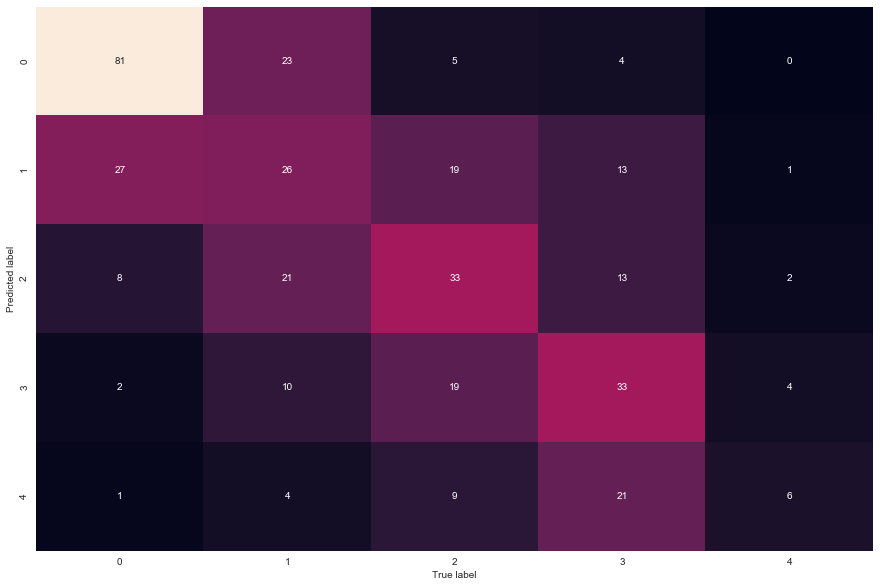

In [252]:
# Plot a confusion matrix using Seaborn's heatmap().
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");

plot_conf_mat(conf_mat)